# 2D Four-well potential

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

%matplotlib inline

Load sampled data: discretized Langevin dynamics at temperature T=1, friction 1, and time step size dt=0.01

In [2]:
X=np.load('Data/4wells_traj.npy')

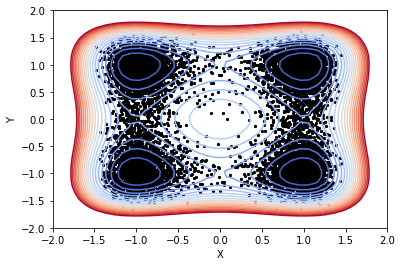

In [3]:
def DW1(x):
        return 2.0*(np.linalg.norm(x)**2-1.0)**2

def DW2(x):
        return 4.0*(np.linalg.norm(x)**2-1.0)**2

def DW(x):
    return DW1(x[0]) + DW1(x[1])

from matplotlib import cm

mx=5

xe=np.linspace(-mx, mx, 100)
ye=np.linspace(-mx, mx, 100)
energyContours=np.zeros((100, 100))
for i in range(0,len(xe)):
            for j in range(0,len(ye)):
                xtmp=np.array([xe[i], ye[j]] )
                energyContours[j,i]=DW(xtmp)

levels = np.arange(0, 10, 0.5)
plt.contour(xe, ye, energyContours, levels, cmap=cm.coolwarm)
plt.scatter(X[:,0], X[:,1], s=5, c='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()


 Compute diffusion map embedding

In [5]:
mydmap = dm.DiffusionMap(n_evecs = 2, epsilon = .01, alpha = 1.0, k=200)
dmap = mydmap.fit_transform(X)

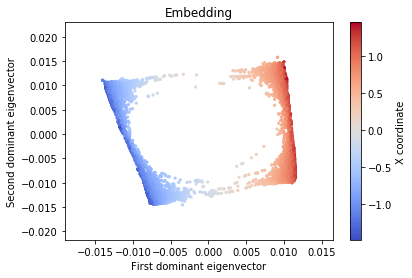

In [6]:
from matplotlib import cm
plt.scatter(dmap[:,0], dmap[:,1], c=X[:,0], s=5, cmap=cm.coolwarm)

clb=plt.colorbar()
clb.set_label('X coordinate')
plt.xlabel('First dominant eigenvector')
plt.ylabel('Second dominant eigenvector')
plt.title('Embedding')

plt.show()

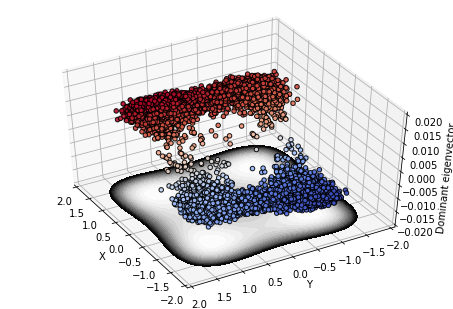

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

xx=np.meshgrid(X[:,0])
yy=np.meshgrid(X[:,1])

cset = ax.contourf(xe, ye, energyContours, levels=levels,offset=-0.02, cmap=cm.Greys)
ax.scatter(X[:,0], X[:,1], dmap[:,0], c= dmap[:,0], alpha=0.90, edgecolors='none', s=20, depthshade=True,  cmap=cm.coolwarm)
ax.view_init(elev=45., azim=150)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Dominant eigenvector')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-0.02,0.02])

plt.show()